In [1]:
import pandas as pd
import numpy as np

In [3]:
players = pd.read_csv("players_22.csv")
players

C:\Users\a-dinchdonmez\AppData\Local\Temp\ipykernel_15984\522126023.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [5]:
features = ["overall","potential","wage_eur","value_eur","age"]
features

['overall', 'potential', 'wage_eur', 'value_eur', 'age']

In [6]:
players = players.dropna(subset=features)

In [14]:
data = players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


## 1. Scale the data

In [15]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,1.916500e+04,19165.000000
mean,65.760188,71.079990,9021.721889,2.850452e+06,25.190034
std,6.882803,6.087721,19476.005074,7.613700e+06,4.727515
min,47.000000,49.000000,500.000000,9.000000e+03,16.000000
25%,61.000000,67.000000,1000.000000,4.750000e+05,21.000000
50%,66.000000,71.000000,3000.000000,9.750000e+05,25.000000
75%,70.000000,75.000000,8000.000000,2.000000e+06,29.000000
max,93.000000,95.000000,350000.000000,1.940000e+08,43.000000


In [16]:
data.min()

overall        47.0
potential      49.0
wage_eur      500.0
value_eur    9000.0
age            16.0
dtype: float64

In [17]:
data - data.min()

,overall,potential,wage_eur,value_eur,age
0,46.0,44.0,319500.0,77991000.0,18.0
1,45.0,43.0,269500.0,119491000.0,16.0
2,44.0,42.0,269500.0,44991000.0,20.0
3,44.0,42.0,269500.0,128991000.0,13.0
4,44.0,42.0,349500.0,125491000.0,14.0
...,...,...,...,...,...
19234,0.0,3.0,500.0,61000.0,6.0
19235,0.0,10.0,0.0,101000.0,3.0
19236,0.0,6.0,0.0,91000.0,5.0
19237,0.0,11.0,0.0,101000.0,3.0


In [18]:
data.max() - data.min()

overall             46.0
potential           46.0
wage_eur        349500.0
value_eur    193991000.0
age                 27.0
dtype: float64

In [19]:
(data - data.min())/ (data.max() - data.min())

,overall,potential,wage_eur,value_eur,age
0,1.000000,0.956522,0.914163,0.402034,0.666667
1,0.978261,0.934783,0.771102,0.615962,0.592593
2,0.956522,0.913043,0.771102,0.231923,0.740741
3,0.956522,0.913043,0.771102,0.664933,0.481481
4,0.956522,0.913043,1.000000,0.646891,0.518519
...,...,...,...,...,...
19234,0.000000,0.065217,0.001431,0.000314,0.222222
19235,0.000000,0.217391,0.000000,0.000521,0.111111
19236,0.000000,0.130435,0.000000,0.000469,0.185185
19237,0.000000,0.239130,0.000000,0.000521,0.111111


In [20]:
data = (data - data.min())/ (data.max() - data.min()) * 9 + 1
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [21]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


## 2. Initialize random centroids

In [25]:
def random_centroids(data, k):
    centeroids = []
    for i in range(k):
        centeroid =  data.apply(lambda x: float(x.sample()))
        centeroids.append(centeroid)
    return pd.concat(centeroids, axis = 1)

In [30]:
centeroids = random_centroids(data, 5)
centeroids

C:\Users\a-dinchdonmez\AppData\Local\Temp\ipykernel_15984\185169485.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centeroid =  data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
overall,4.913043,6.869565,8.434783,3.347826,4.326087
potential,5.891304,5.304348,5.695652,5.108696,4.326087
wage_eur,1.000000,1.090129,1.579399,1.064378,1.424893
value_eur,1.171240,1.029738,1.035538,1.134125,1.034378
age,7.000000,4.666667,6.333333,4.666667,4.333333


## 3. Label each data point

In [34]:
def get_labels(data, centeroids):
    distances = centeroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [36]:
labels = get_labels(data, centeroids)
labels

0        2
1        2
2        2
3        2
4        2
        ..
19234    4
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [37]:
labels.value_counts()

4    8124
1    4277
3    4076
0    2131
2     557
Name: count, dtype: int64

## 4. Update centeroids

In [39]:
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

,0,1,2,3,4
overall,5.244556,6.068122,7.649479,3.019091,4.246008
potential,4.849493,6.388896,7.318736,5.267483,4.570068
wage_eur,1.153134,1.442359,2.528781,1.030880,1.062539
value_eur,1.042105,1.268595,1.976582,1.028080,1.041469
age,6.720472,3.956882,5.836408,2.225298,3.939388


In [45]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [47]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()


## 5. Repeat steps 3 and 4 until centroids stop changing

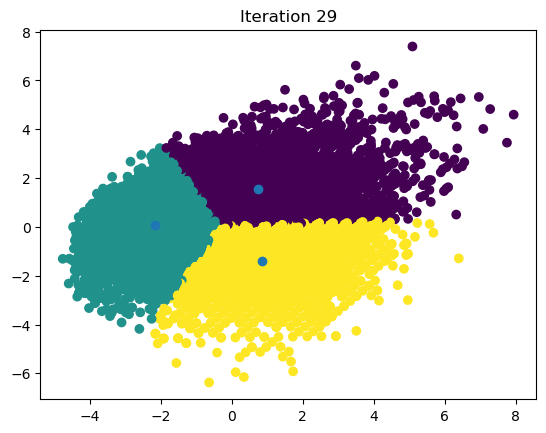

In [68]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [67]:
players[labels == 3] [["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
6230,C. Gutiérrez,69,81,6000.0,3400000.0,22
6254,Iñaki Peña,69,80,29000.0,2700000.0,22
6265,Jaume Grau,69,78,10000.0,2900000.0,24
6309,Patrick William,69,77,4000.0,2900000.0,24


## Sckit-Learn

In [70]:
from sklearn.cluster import KMeans

In [71]:
kmeans = KMeans(3)
kmeans.fit(data)

c:\AnacTest\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [72]:
centeroids = kmeans.cluster_centers_

In [74]:
pd.DataFrame(centeroids, columns=features).T

,0,1,2
overall,4.800991,3.599859,6.231096
potential,4.503972,5.205869,6.623746
wage_eur,1.112902,1.039947,1.657093
value_eur,1.040011,1.035792,1.413686
age,5.609167,2.712386,4.139879


In [69]:
centroids

,0,1,2
overall,5.807503,3.205672,4.781960
potential,6.497870,4.930905,4.506813
wage_eur,1.420500,1.028564,1.118498
value_eur,1.285685,1.026655,1.044909
age,3.598215,2.514741,5.467648
